In [1]:
%load_ext autoreload
%autoreload 2 

# Set path to find modelling tools for later use
import os
import sys
sys.path.append(os.path.join(os.getcwd(),".."))
import pandas as pd

from IPython.display import display
from src.preprocess import preprocessMRC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
df = pd.read_csv("../data/MRC/MRCData-processed-interpolated.csv")

/Users/nd/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
target_sentences = df.sentence_content.unique()[:,np.newaxis]

In [4]:
target_sentences

array([['Books include Penguin Island, a satire on the Dreyfus affair'],
       ['However, religions other than Islam, use a different pronunciation for Allah, although the spelling is the same'],
       ['The Franks alliance was important exactly because of their renown hostility towards the Byzantine'],
       ['He is buried in Egypt, Aswan at the Mausoleum of Aga Khan'],
       ['The w-shaped glyph above the second consonant that it geminates, is in fact the beginning of a small letter'],
       ['The novel explores the relationship between Patroclus and Achilles from boyhood to the fateful events of the Iliad'],
       ['Generally considered a part of Central Asia, it is sometimes ascribed to a regional bloc in either the Middle East or South Asia'],
       ['Although early behavioural or cognitive intervention can help children gain self-care, social, and communication skills, their is no known cure'],
       ["Lincoln's coffin would be encased in concrete several feet thick, and 

In [5]:
proc = preprocessMRC()
out = proc()

	Medical Research Council funded PD copy-typing data.



/Users/nd/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Removal of sentences with 'high' Levenshtein distance...

Size of dataframe before row pruning: (433672, 12)
Size of dataframe after row pruning: (433411, 12)

Removal of sentences with left/right arrows keys...

Size of dataframe before row pruning: (433411, 12)
Size of dataframe after row pruning: (414321, 12)
Using mode: MRC_MODE

Total number of study subjects: 229
Number of sentences typed by PD patients: 1415
Number of sentences typed by controls: 1862
Average sentence length: 120.30
Minimum sentence length: 51
Maximum sentence length: 241


### Plots

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def split(word): 
    return [char.lower() for char in word]  

def get_sentence_stats(df, target_sentences, sentence_id, diagnosis = 0,chars_to_consider=10):
    
    # load target sentences first
    assert sentence_id in range(0,target_sentences.shape[0])
    ref_sent = split(list(target_sentences[sentence_id-1,:])[0]) # Note that the reference sentences are zero-indexed
    print("This is the target sentence: {}".format(target_sentences[sentence_id-1,:]))
    print("Chars to consider: {}".format(ref_sent[:chars_to_consider]))
    
    iki_stats = {k:[] for k in ref_sent[:chars_to_consider]}
    hold_time_stats = {k:[] for k in ref_sent[:chars_to_consider]}
    pause_time_stats = {k:[] for k in ref_sent[:chars_to_consider]}
    
    # Get the unique number of subjects
    subjects = sorted(set(df.Participant_ID))  # NOTE: set() is weakly rando
    # Loop over subjects
    for subject in subjects:
        # Not all subjects have typed all sentences hence we have to do it this way
        if str(sentence_id) in df.loc[(df.Participant_ID == subject) & (df.Diagnosis == diagnosis)].Sentence_ID.unique():
            # Sentence has been typed so we collect the stats
            
            # Locate df segment to extract
            coordinates = (df.Participant_ID == subject) & (df.Sentence_ID == str(sentence_id))
            
            # To make more sense of the statistics we only collect it _if_ the subject has typed same character
            # the reference sentence.
            typed_sent = df.loc[coordinates, "Preprocessed_typed_sentence"].tolist()[0]
            iki = df.loc[coordinates, "IKI_timings"].tolist()[0]
            hold_time = df.loc[coordinates, "hold_time"].tolist()[0]
            pause_time = df.loc[coordinates, "pause_time"].tolist()[0]
            
            # Find char stats
            for i,c in enumerate(ref_sent[:chars_to_consider]):
                # print(subject,sentence_id,typed_sent[c],ref_sent[c])
                if typed_sent[i] == c:
                    iki_stats[c].append(iki[i])
                    hold_time_stats[c].append(hold_time[i])
                    pause_time_stats[c].append(pause_time[i])

    return iki_stats, hold_time_stats, pause_time_stats

def get_summary_stats(stats):
    return [np.mean(stats[i]) for i in stats.keys()], [np.std(stats[i]) for i in stats.keys()]

def make_time_comparison_plot(control_times, pd_times):
    
    # Moments calculated from raw data
    control_times_mean, control_time_std = get_summary_stats(control_times)
    pd_times_mean, pd_times_std = get_summary_stats(pd_times)

    # Position of bars on x-axis
    N = len(control_times)
    ind = np.arange(N)

    # Figure size
    plt.figure(figsize=(N*2,5))

    # Width of a bar 
    width = 0.2       

    # Plotting
    plt.bar(ind, control_times_mean , width, yerr=control_time_std, align='center', label='Control',capsize=5)
    plt.bar(ind + width, pd_times_mean, width, yerr=pd_times_std, align='center', label='Parkinsons',capsize=5)

    plt.ylabel('')

    # xticks()
    # First argument - A list of positions at which ticks should be placed
    # Second argument -  A list of labels to place at the given locations
    plt.xticks(ind + width / 2, range(N))

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    plt.show()

In [19]:
for k in [1]:
    iki_0,hold_time_0,pause_time_0 = get_sentence_stats(df=out,target_sentences=target_sentences,sentence_id=k,diagnosis=0,chars_to_consider=5)
    iki_1,hold_time_1,pause_time_1 = get_sentence_stats(df=out,target_sentences=target_sentences,sentence_id=k,diagnosis=1,chars_to_consider=5)
#     for i,j in zip(a.keys(),b.keys()):
#         if not a[i] or not b[j]:
#             print('Key is empty: ({},{}).'.format(i,j))
            
#     print(k, "\n\n\n")

This is the target sentence: ['Books include Penguin Island, a satire on the Dreyfus affair']
Chars to consider: ['b', 'o', 'o', 'k', 's']
This is the target sentence: ['Books include Penguin Island, a satire on the Dreyfus affair']
Chars to consider: ['b', 'o', 'o', 'k', 's']


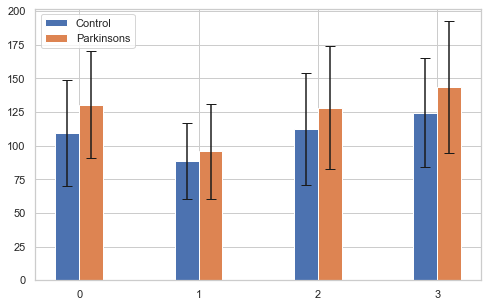

In [14]:
sns.set(style="whitegrid",palette="deep")
make_time_comparison_plot(hold_time_0, hold_time_1)

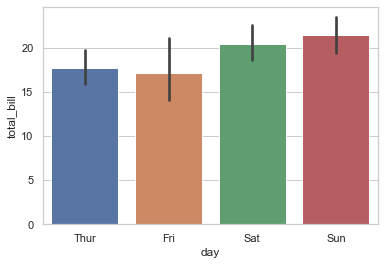

In [243]:
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [242]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
